## DFT implementation

In [12]:
import numpy as np
np.set_printoptions(precision=4)
from numpy import pi, sin, cos
import matplotlib.pyplot as plt

# Only is jupyterthemes is installed
from jupyterthemes import jtplot
jtplot.style()

We will compute the DFT

\begin{equation*}
X(m) = \sum_{n = 0}^{N-1} x(n)\: \cdot e^{-j2\pi nm/N}
\label{eq:vector_ray} \tag{1}
\end{equ`ation*}

where:
* m is the discrete freq varible
* n is the discrete time variable
* N is total number of samples

Now, we will implement it using Euler's identity

\begin{equation*}
X(m) = \sum_{n=0}^{N-1} x(n)\: \cdot \left[ \: cos(2\pi nm/N) -jsin(2\pi nm/N) \: \right]
\label{eq:vector_ray} \tag{2}
\end{equation*}

In [18]:
class Sinusoidals:
    def __init__(self, fs=1000, total_time=1, compute_sum=True, **kwargs):
        '''
        kwargs : Dict with sinusoidal parameters, A, freq, phi, sin or cos
        '''
        
        self.fs = fs
        self.total_time = total_time
        self.signals = kwargs
        
        self.ts = 1/self.fs
        self.total_samples = self.fs * self.total_time
        self.N = np.arange(self.total_samples)
        
        self.compute_sum = compute_sum
        self.sinusoidals = {}
        
        self.gen_sinusoidals()
    
    def __call__(self):
        
        self.plot_signals()
    
    def gen_sinusoidals(self):
        '''
        self.signals : Dict with sinusoidal parameters, (A, freq, phi, sin or cos)
        {'y1':(1, 1000, pi, 'sin'), 'y2':(0.5, 2000, 3/4*pi, 'sin')}
        '''
        if self.signals:
            functions = {'sin':sin, 'cos':cos}
            total_signals =len(self.signals)
            for A, freq, phi, sinu in self.signals.values():
                self.sinusoidals[str(freq)+'_Hz_'+sinu] = A*functions[sinu](2*pi*freq*self.N*self.ts + phi)
                
            if self.compute_sum:
                self.sinusoidals['Signals_sum'] = sum(self.sinusoidals.values())
            
#             return self.sinusoidals
        else:
            print('There are no signals to generate')
    
    def plot_signals(self):
        if self.sinusoidals:
            total_sinusoidals = len(self.sinusoidals)
            _, ax = plt.subplots(figsize=(20,10))
            for k, v in self.sinusoidals.items():
                ax.plot(self.N*self.ts, v, 'o', label=k)
            ax.legend()
            plt.show()
        else:
            print('There is nothing to plot')
    
    def DFT(self, signal):
        N = 1024
        a = np.zeros_like(self)
        b = np.zeros(N)

        for c in range(len(b)):
            b[c] = np.sin(2*np.pi*c/N)

        for k in range(signal):
            sum = 0

            for n in range(0,N):
                sum = sum + (b[n] * (np.cos((2*np.pi*n*self[k])/N) - 1j*np.sin((2*np.pi*n*self[k])/N)))

            sum = np.abs(sum)
            a[k] = sum
        return a    

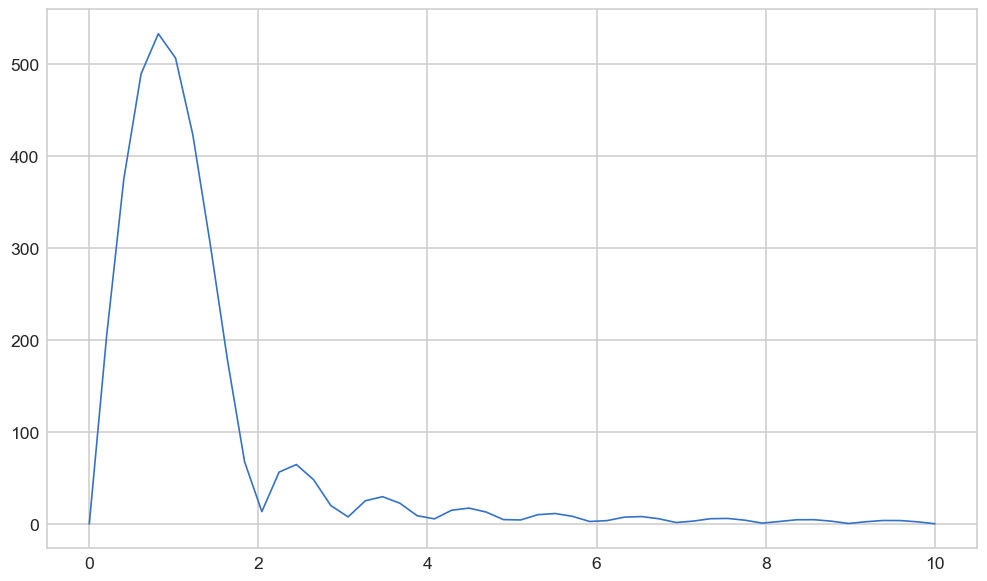

In [21]:
self10 = np.linspace(0,10,50)
signal10 = Sinusoidals.DFT(self10, len(self10))
fig = plt.figure(figsize = (12, 7))
plt.plot(self10, signal10)
plt.show()

In [15]:
signal_1 = Sinusoidals(**{'y1':(1, 4, pi, 'sin'), 'y2':(0.5, 5, 3/4*pi, 'cos')})

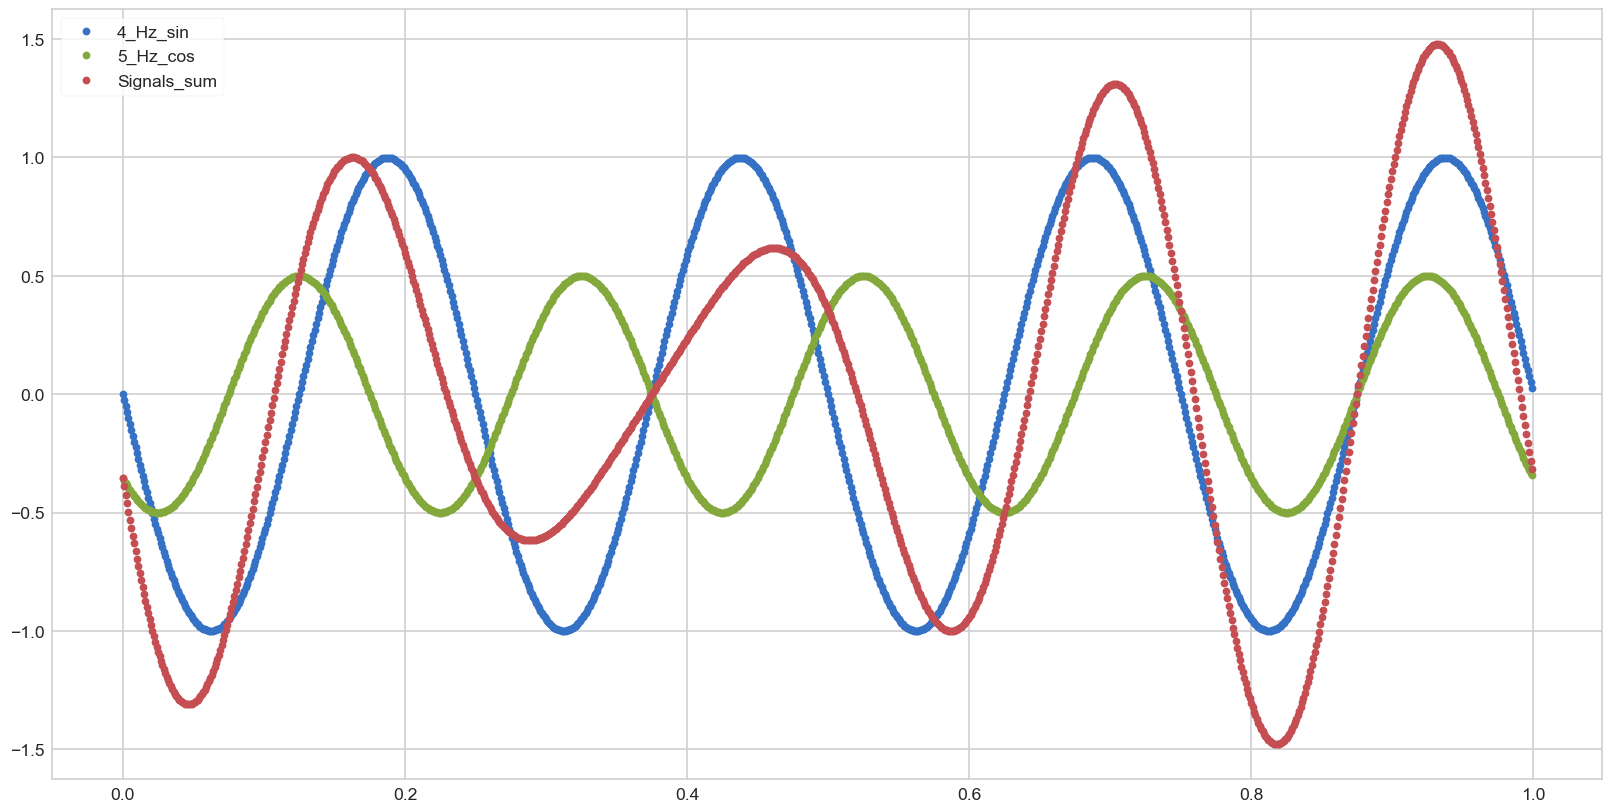

In [16]:
signal_1()

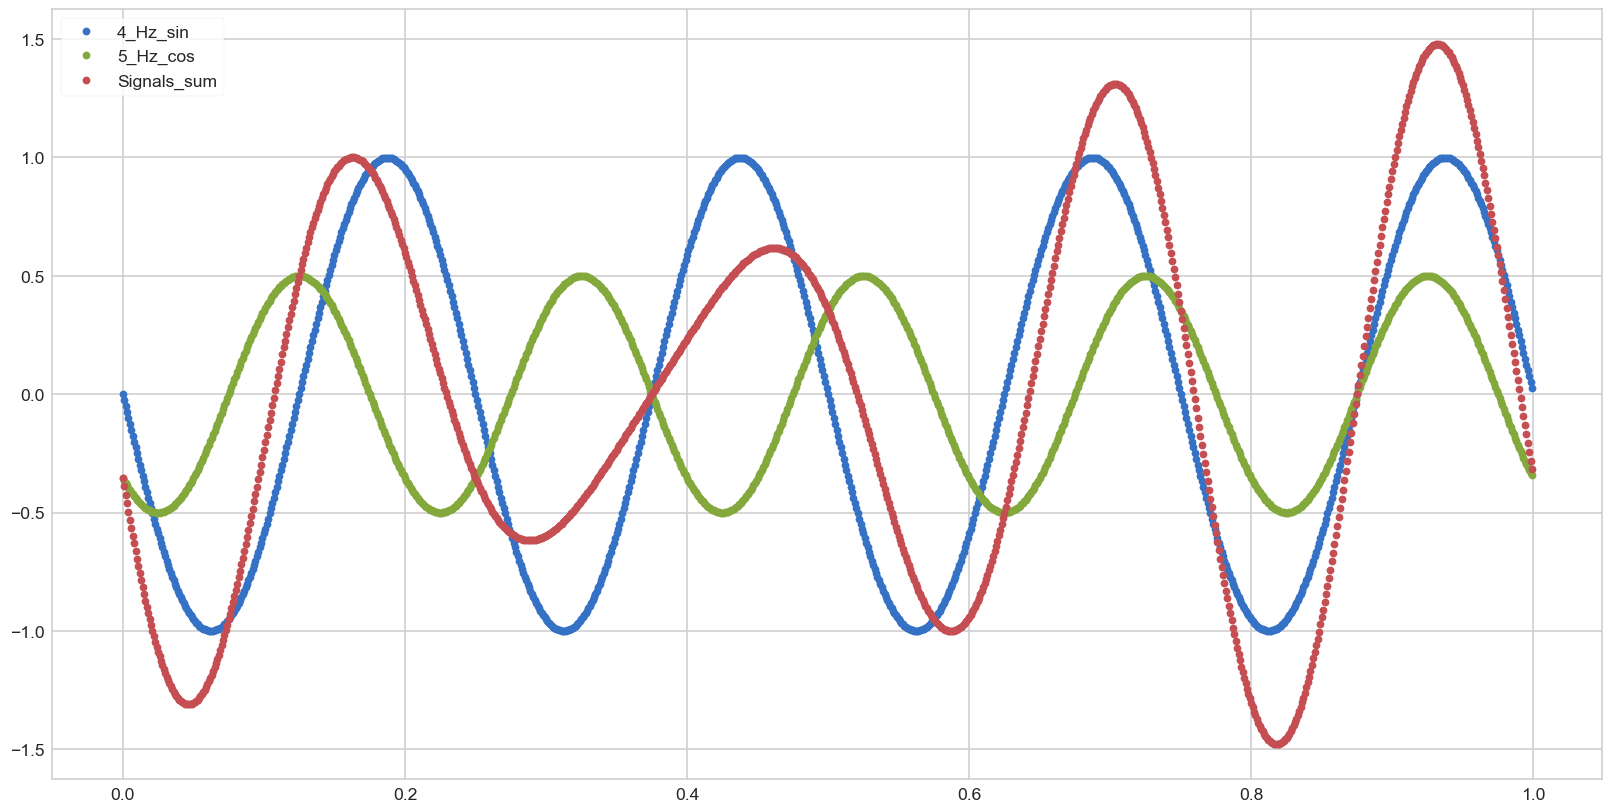

In [17]:
signal_1()

In [6]:
signal_1.fs

1000

In [7]:
signal_1.gen_sinusoidals()

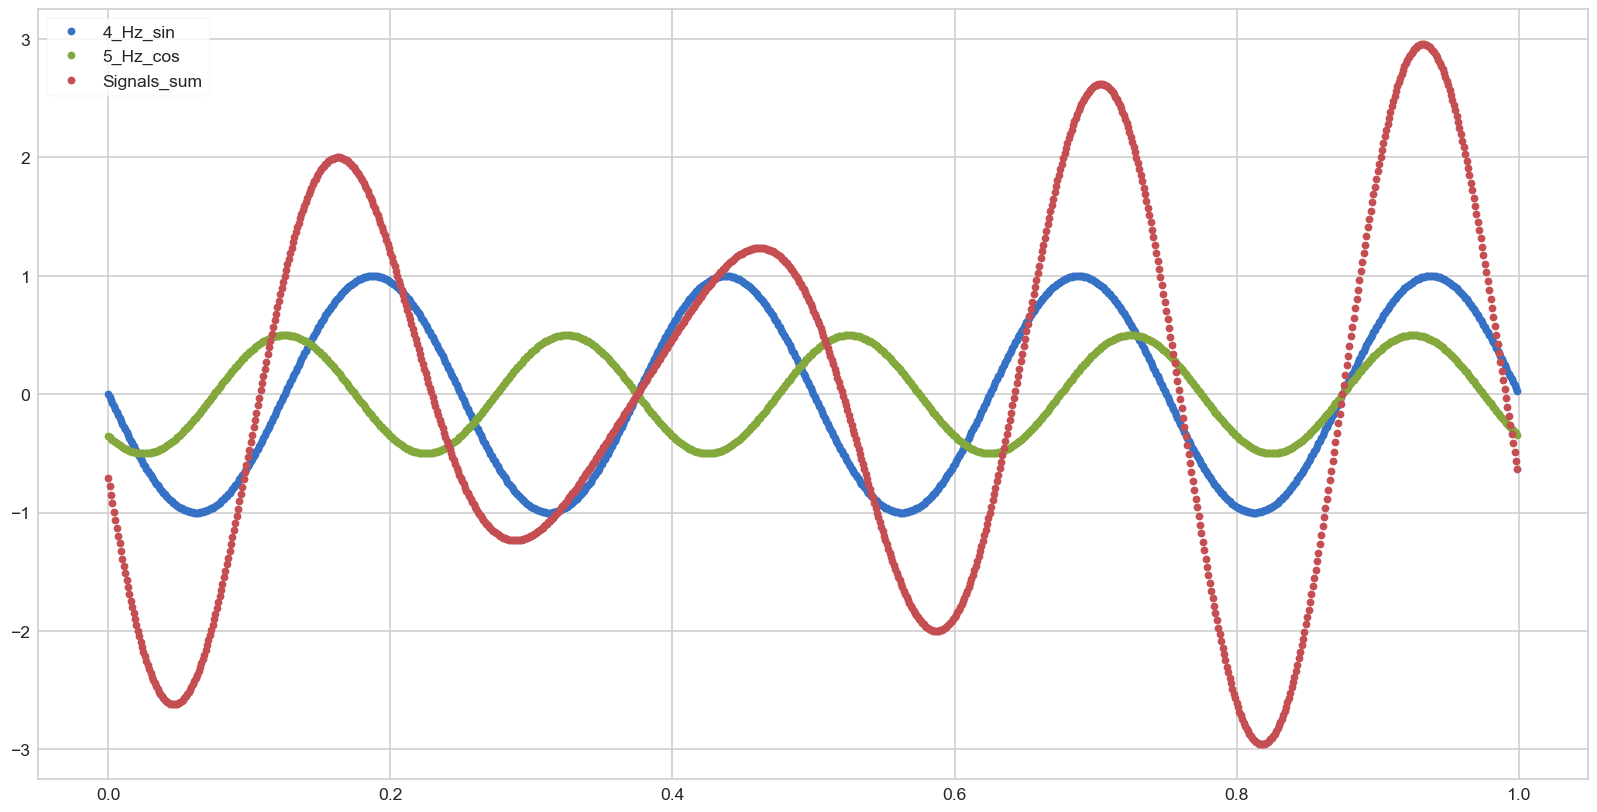

In [8]:
signal_1.plot_signals()